In [2]:
import pymongo
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
client=pymongo.MongoClient("Enter your shell keydb=client.sample_airbnb
col = db.listingsAndReviews

In [4]:
document = col.find_one()
document

{'_id': '1003530',
 'listing_url': 'https://www.airbnb.com/rooms/1003530',
 'name': 'New York City - Upper West Side Apt',
 'summary': '',
 'space': 'Murphy bed, optional second bedroom available. Wifi available, Hulu, Netflix, TV Eat-in kitchen. Bathroom with great shower/bath.  Washer/dryer in basement.',
 'description': "Murphy bed, optional second bedroom available. Wifi available, Hulu, Netflix, TV Eat-in kitchen. Bathroom with great shower/bath.  Washer/dryer in basement. New York City! Great neighborhood - many terrific restaurants, bakeries, bagelries. Within easy walking distance are restaurants with the cuisines from India, Thailand, Japan, China, Mexico, South America and Europe.  As well as the many small independent stores that line Broadway, there chain stores such as Urban Outfitters (clothing), Whole Foods (groceries), Sephora (cosmetics), Michaels (crafts), and Modell's (sporting goods). Equidistant to Central Park and Riverside Park which have walking/running/biking t

In [5]:
airbnb_data = []
for i in col.find():
    data=dict(Id=i['_id'],
              Listing_url = i['listing_url'],
              Listing_Name = i.get('name'),
              Description = i['description'],
              House_rules = i.get('house_rules'),
              Property_type = i['property_type'],
              Room_type = i['room_type'],
              Bed_type = i['bed_type'],
              Min_nights = int(i['minimum_nights']),
              Max_nights = int(i['maximum_nights']),
              Cancellation_policy = i['cancellation_policy'],
              Accomodates = i['accommodates'],
              Total_bedrooms = i.get('bedrooms'),
              Total_beds = i.get('beds'),
              Availability_365 = i['availability']['availability_365'],
              Price = i['price'],
              Security_deposit = i.get('security_deposit'),
              Cleaning_fee = i.get('cleaning_fee'),
              Extra_people = i['extra_people'],
              Guests_included = i['guests_included'],
              No_of_reviews = i['number_of_reviews'],
              Review_score = i['review_scores'].get('review_scores_rating'),
              Amenities = ','.join(i['amenities']),
              Host_id = i['host']['host_id'],
              Host_name = i['host']['host_name'],
              Street = i['address']['street'],
              Country = i['address']['country'],
              Country_code = i['address']['country_code'],
              Location_type = i['address']['location']['type'],
              Longitude = i['address']['location']['coordinates'][0],
              Latitude = i['address']['location']['coordinates'][1])
    airbnb_data.append(data)

In [6]:
df = pd.DataFrame(airbnb_data)
df.head()

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",No smoking is permitted in the apartment. All ...,Apartment,Private room,Real Bed,12,360,...,94.0,"Internet,Wifi,Air conditioning,Kitchen,Elevato...",454250,Greta,"New York, NY, United States",United States,US,Point,-73.965230,40.799620
1,10069642,https://www.airbnb.com/rooms/10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,,Apartment,Entire home/apt,Real Bed,15,20,...,NaN,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",51670240,Jonathan,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.431112,-23.000358
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,The general welfare and well being of all the ...,Condominium,Entire home/apt,Real Bed,3,365,...,84.0,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",5448114,David,"Honolulu, HI, United States",United States,US,Point,-157.839190,21.286340
3,10082307,https://www.airbnb.com/rooms/10082307,Double Room en-suite (307),A standard double room with a queen size doubl...,,Apartment,Private room,Real Bed,1,1125,...,NaN,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",51289938,Ken,"Hong Kong, Kowloon, Hong Kong",Hong Kong,HK,Point,114.171580,22.304690
4,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Apartment,Private room,Real Bed,14,1125,...,100.0,"Internet,Wifi,Air conditioning,Kitchen,Buzzer/...",11275734,Josh,"Brooklyn, NY, United States",United States,US,Point,-73.936150,40.697910


In [8]:
#CHECKING NULL VALUES AND DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   object 
 1   Listing_url          5555 non-null   object 
 2   Listing_Name         5555 non-null   object 
 3   Description          5555 non-null   object 
 4   House_rules          5555 non-null   object 
 5   Property_type        5555 non-null   object 
 6   Room_type            5555 non-null   object 
 7   Bed_type             5555 non-null   object 
 8   Min_nights           5555 non-null   int64  
 9   Max_nights           5555 non-null   int64  
 10  Cancellation_policy  5555 non-null   object 
 11  Accomodates          5555 non-null   int64  
 12  Total_bedrooms       5550 non-null   float64
 13  Total_beds           5542 non-null   float64
 14  Availability_365     5555 non-null   int64  
 15  Price                5555 non-null   o

In [9]:
# CHECKING MISSING VALUES
df.isnull().sum()

Id                        0
Listing_url               0
Listing_Name              0
Description               0
House_rules               0
Property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accomodates               0
Total_bedrooms            5
Total_beds               13
Availability_365          0
Price                     0
Security_deposit       2084
Cleaning_fee           1531
Extra_people              0
Guests_included           0
No_of_reviews             0
Review_score           1474
Amenities                 0
Host_id                   0
Host_name                 0
Street                    0
Country                   0
Country_code              0
Location_type             0
Longitude                 0
Latitude                  0
dtype: int64

In [10]:
Total_bedrooms_df = df[df['Total_bedrooms'].isnull()]
Total_bedrooms_df

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
190,1132409,https://www.airbnb.com/rooms/1132409,Amazing Upper West Side Loft-Studio,This is an Large Space - Loft Like (about 500 ...,No Pets or Smoking are allowed!,Loft,Entire home/apt,Real Bed,30,1125,...,93.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",3038687,Karen,"New York, NY, United States",United States,US,Point,-73.97589,40.78898
1322,16796969,https://www.airbnb.com/rooms/16796969,Modern room near the beach.Amazing location!,Enjoy our amazing apartment while we are away....,,Apartment,Private room,Real Bed,30,32,...,NaN,"TV,Wifi,Air conditioning,Kitchen,Heating,Washe...",53764859,Lu,"Sans Souci, NSW, Australia",Australia,AU,Point,151.13183,-33.99202
1404,17435095,https://www.airbnb.com/rooms/17435095,The Porto Concierge - Marques House | 402,"Room in renovated house, located in Marques ar...","- Smoking is not allowed inside the apartment,...",House,Private room,Real Bed,2,1125,...,95.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",117930909,Beatriz,"Porto, Porto, Portugal",Portugal,PT,Point,-8.60725,41.16119
3151,2682827,https://www.airbnb.com/rooms/2682827,,Sultanahmet room in hotel at the old city . Lo...,,Apartment,Entire home/apt,Real Bed,2,120,...,90.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",13733426,Saim,"İstanbul, İstanbul, Turkey",Turkey,TR,Point,28.97127,41.00325
4435,31486435,https://www.airbnb.com/rooms/31486435,Ataşehir,Ataşehirde site ortamında otoparklı asansörlü ...,,Apartment,Entire home/apt,Real Bed,1,19,...,NaN,"TV,Wifi,Kitchen,Free parking on premises,Break...",235894250,Günay,"Dudullu Osb, İstanbul, Turkey",Turkey,TR,Point,29.14500,40.98795


In [11]:
TB_unique = df.Total_bedrooms.unique()
TB_unique

array([ 1.,  2.,  0.,  4.,  3.,  6., nan,  5.,  9.,  7., 20., 10.,  8.,
       15.])

In [12]:
TBS_unique = df.Total_beds.unique()
TBS_unique

array([ 1.,  2.,  8.,  3.,  5.,  4.,  6.,  0.,  7., 10., nan, 15.,  9.,
       14., 25., 13., 12., 11., 18., 16.])

In [13]:
df.Security_deposit = df.Security_deposit[~df.Security_deposit.isna()].astype(str).astype(float)
df.Security_deposit.unique()

array([    0.,  4476.,    nan,   200.,   300.,   250.,   800.,  1000.,
         500.,   400.,   275.,   136.,   150.,   100.,  3730.,   600.,
         199.,  1865.,   128.,   527.,   700.,  1500.,  5000.,   120.,
         450.,   596.,   776.,    90.,   330.,   724.,  3900.,   350.,
        1055.,  2000.,   373.,  1845.,  2800.,   560., 10000.,  1570.,
        2500.,   367.,   785.,   309.,  1200.,   900.,  5595.,  3500.,
        3005.,   125.,   536.,  7000.,  1300., 13055.,   480.,  3000.,
         341.,  4000.,  1100.,   380.,   240.,  9325.,   947.,  1999.,
         746.,  2600., 18650.,   550.,  1292.,  5100.,   320.,   195.,
         750.,  1679.,  1492.,   671.,   329.,   175.,   999.,   180.,
        2534.,  6500., 15000.,   399.,   215.,   325.,   130.,   555.,
         145.,   972.,    85.,   348.,    75.,   791.,   213.,   981.,
         140.,  1582.,   135.,  1800.,   950.,  1501.,   772.,   249.,
         995.,   299.,   888.,   633.,   126.,    89.,  1600.,   110.,
      

In [14]:
df.Cleaning_fee = df.Cleaning_fee[~df.Cleaning_fee.isna()].astype(str).astype(float)
df.Cleaning_fee.unique()

array([ 135.,  112.,  100.,   nan,   50.,    0.,  118.,   80.,  120.,
         60.,  150.,   20.,   85.,   35.,  187.,  211.,  185.,   25.,
         90.,  300.,   12.,  250.,   10.,   59.,   30.,   15.,  298.,
         95.,   26.,  180.,   99.,  130.,  380.,  345.,   40.,  160.,
          7.,  373.,  500.,  140.,   75.,  400.,  200.,  125.,  350.,
         93.,  169.,  155.,   65.,  237.,  285.,  240.,  141.,   69.,
        270.,  193.,  175.,   55.,  107.,  131.,   70.,    5.,  600.,
        199.,   19.,   45.,  942.,  156.,  157.,  260.,  165.,  242.,
        115.,  170.,  268.,  119.,   79.,  124.,   16.,   29.,   48.,
        225.,  578.,  110.,   42.,  215.,  145.,  204.,  111.,  275.,
        261.,    6.,  105.,  329.,  399.,  560.,  336.,  264.,   98.,
        153.,  168.,   37.,  325.,  290.,    8.,   84.,   63.,  448.,
         17.,  332.,  174.,  132., 2000.,  450.,  596.,   56.,   94.,
         23.,   53.,  254.,   24.,  196.,   49.,  269.,  422.,  208.,
        308.,  220.,

In [15]:
df.Review_score.unique()

array([ 94.,  nan,  84., 100.,  80.,  92.,  95.,  96.,  97.,  71.,  93.,
        89.,  90.,  99.,  91.,  83.,  98.,  88.,  67.,  73.,  60.,  87.,
        76.,  78.,  82.,  65.,  86.,  70.,  85.,  81.,  40.,  77.,  69.,
        74.,  75.,  72.,  79.,  20.,  50.,  53.,  68.,  64.])

In [16]:
#FILLING NULL VALUES
df.Total_bedrooms.fillna(df.Total_bedrooms.mode()[0], inplace=True)
df.Total_beds.fillna(df.Total_beds.median(), inplace=True)
df.Security_deposit.fillna(df.Security_deposit.median(), inplace=True)
df.Cleaning_fee.fillna(df.Cleaning_fee.median(), inplace=True)
df.Review_score.fillna(df.Review_score.median(), inplace=True)

In [17]:
df.isnull().sum()

Id                     0
Listing_url            0
Listing_Name           0
Description            0
House_rules            0
Property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accomodates            0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Security_deposit       0
Cleaning_fee           0
Extra_people           0
Guests_included        0
No_of_reviews          0
Review_score           0
Amenities              0
Host_id                0
Host_name              0
Street                 0
Country                0
Country_code           0
Location_type          0
Longitude              0
Latitude               0
dtype: int64

In [18]:
df.dtypes

Id                      object
Listing_url             object
Listing_Name            object
Description             object
House_rules             object
Property_type           object
Room_type               object
Bed_type                object
Min_nights               int64
Max_nights               int64
Cancellation_policy     object
Accomodates              int64
Total_bedrooms         float64
Total_beds             float64
Availability_365         int64
Price                   object
Security_deposit       float64
Cleaning_fee           float64
Extra_people            object
Guests_included         object
No_of_reviews            int64
Review_score           float64
Amenities               object
Host_id                 object
Host_name               object
Street                  object
Country                 object
Country_code            object
Location_type           object
Longitude              float64
Latitude               float64
dtype: object

In [19]:
df.head()

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",No smoking is permitted in the apartment. All ...,Apartment,Private room,Real Bed,12,360,...,94.0,"Internet,Wifi,Air conditioning,Kitchen,Elevato...",454250,Greta,"New York, NY, United States",United States,US,Point,-73.965230,40.799620
1,10069642,https://www.airbnb.com/rooms/10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,,Apartment,Entire home/apt,Real Bed,15,20,...,95.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",51670240,Jonathan,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.431112,-23.000358
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,The general welfare and well being of all the ...,Condominium,Entire home/apt,Real Bed,3,365,...,84.0,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",5448114,David,"Honolulu, HI, United States",United States,US,Point,-157.839190,21.286340
3,10082307,https://www.airbnb.com/rooms/10082307,Double Room en-suite (307),A standard double room with a queen size doubl...,,Apartment,Private room,Real Bed,1,1125,...,95.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",51289938,Ken,"Hong Kong, Kowloon, Hong Kong",Hong Kong,HK,Point,114.171580,22.304690
4,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Apartment,Private room,Real Bed,14,1125,...,100.0,"Internet,Wifi,Air conditioning,Kitchen,Buzzer/...",11275734,Josh,"Brooklyn, NY, United States",United States,US,Point,-73.936150,40.697910


In [20]:
df['Bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [21]:
df.House_rules.unique()

array(['No smoking is permitted in the apartment. All towels that are used should be placed in the bath tub upon departure. I have a cat, Samantha, who can stay or go, whichever is preferred.   Please text me upon departure.',
       '', 'The general welfare and well being of all the community.',
       ...,
       'Keeping clean the places which you use is very important for me.',
       'Not suitable for elderly, children below 12 years old or wheelchair. No shoes in the house please,  No smoking in the house.( rear courtyard allowable ) No partying allow. No one allow to stay over unless listed guests.',
       'Only guests who are registered for the stay are to be residing in the apartment.'],
      dtype=object)

In [22]:
#CONVERTING INTO REQUIRED DATA TYPES
df['Price'] = df['Price'].astype(str).astype(float)
df.Extra_people = df.Extra_people.astype(str).astype(float)
df.Guests_included = df.Guests_included.astype(str).astype(float)

In [23]:
df.dtypes

Id                      object
Listing_url             object
Listing_Name            object
Description             object
House_rules             object
Property_type           object
Room_type               object
Bed_type                object
Min_nights               int64
Max_nights               int64
Cancellation_policy     object
Accomodates              int64
Total_bedrooms         float64
Total_beds             float64
Availability_365         int64
Price                  float64
Security_deposit       float64
Cleaning_fee           float64
Extra_people           float64
Guests_included        float64
No_of_reviews            int64
Review_score           float64
Amenities               object
Host_id                 object
Host_name               object
Street                  object
Country                 object
Country_code            object
Location_type           object
Longitude              float64
Latitude               float64
dtype: object

In [24]:
df.columns

Index(['Id', 'Listing_url', 'Listing_Name', 'Description', 'House_rules',
       'Property_type', 'Room_type', 'Bed_type', 'Min_nights', 'Max_nights',
       'Cancellation_policy', 'Accomodates', 'Total_bedrooms', 'Total_beds',
       'Availability_365', 'Price', 'Security_deposit', 'Cleaning_fee',
       'Extra_people', 'Guests_included', 'No_of_reviews', 'Review_score',
       'Amenities', 'Host_id', 'Host_name', 'Street', 'Country',
       'Country_code', 'Location_type', 'Longitude', 'Latitude'],
      dtype='object')

In [25]:
columns_with_spaces = [col for col in df.columns if any(df[col].astype(str).str.contains('\s', na=False))]
columns_with_spaces

['Listing_Name',
 'Description',
 'House_rules',
 'Property_type',
 'Room_type',
 'Bed_type',
 'Amenities',
 'Host_name',
 'Street',
 'Country']

In [27]:
Empty_Values1 = df[df['Listing_Name'] == '']
Empty_Values1

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
17,10359729,https://www.airbnb.com/rooms/10359729,,We have 2 cozy rooms available from january 12...,,Apartment,Private room,Real Bed,1,1125,...,95.0,"Internet,Wifi,Kitchen,Smoking allowed,Doorman,...",53319251,Seda,"Istanbul, İstanbul, Turkey",Turkey,TR,Point,29.051080,41.088350
140,11012484,https://www.airbnb.com/rooms/11012484,,We're a couple of spanish people and we want t...,"We look for calm and respectful people, frienl...",Apartment,Private room,Real Bed,1,1125,...,95.0,"TV,Wifi",41813973,Mar,"Barcelona, Catalunya, Spain",Spain,ES,Point,2.157590,41.403490
227,11194788,https://www.airbnb.com/rooms/11194788,,This unique concept allows guests to luxuriate...,,Apartment,Private room,Real Bed,1,1125,...,95.0,"Cable TV,Wifi,Air conditioning,Kitchen,Smoking...",3072862,Levent,"Fatih, İstanbul, Turkey",Turkey,TR,Point,28.980180,41.004040
292,11792238,https://www.airbnb.com/rooms/11792238,,This flat I designed from A to Z is the perfec...,Réservation de 7 nuits minimum.,Apartment,Entire home/apt,Real Bed,6,1125,...,80.0,"TV,Wifi,Kitchen,Heating,Washer,Dryer,Smoke det...",2377793,Louis-Philippe,"Montréal, Québec, Canada",Canada,CA,Point,-73.582400,45.549040
3151,2682827,https://www.airbnb.com/rooms/2682827,,Sultanahmet room in hotel at the old city . Lo...,,Apartment,Entire home/apt,Real Bed,2,120,...,90.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",13733426,Saim,"İstanbul, İstanbul, Turkey",Turkey,TR,Point,28.971270,41.003250
4265,3200487,https://www.airbnb.com/rooms/3200487,,,,Apartment,Private room,Real Bed,1,1125,...,95.0,"TV,Wifi,Wheelchair accessible,Kitchen,Elevator...",11554929,Adriana,"Rio, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.196215,-22.918043
5535,9979991,https://www.airbnb.com/rooms/9979991,,"Located at the heart of Kowloon, our unit is s...",,Apartment,Entire home/apt,Real Bed,1,1125,...,95.0,"TV,Internet,Air conditioning,Kitchen,Elevator,...",51283546,Alexis,"Hong Kong, Kowloon, Hong Kong",Hong Kong,HK,Point,114.169630,22.315690
5551,9624500,https://www.airbnb.com/rooms/9624500,,It is up of the main center of Üsküdar. So its...,Keeping clean the places which you use is very...,Serviced apartment,Private room,Real Bed,1,1125,...,95.0,"Cable TV,Internet,Wifi,Kitchen,Smoking allowed...",38468501,Kerem,"Üsküdar, İstanbul, Turkey",Turkey,TR,Point,29.012250,41.020420


In [29]:
No_of_name_rows = df[df['Listing_Name'] == ''].shape[0]
No_of_name_rows

8

In [30]:
Empty_Values2 = df[df['Description'] == '']
Empty_Values2

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
92,10199760,https://www.airbnb.com/rooms/10199760,Uygun nezih daire,,,Apartment,Entire home/apt,Real Bed,1,1125,...,95.0,"TV,Internet,Wifi,Kitchen,Heating,Family/kid fr...",37417314,Yaşar,"Zeytinburnu, İstanbul, Turkey",Turkey,TR,Point,28.899640,40.996670
1113,15908244,https://www.airbnb.com/rooms/15908244,"Quarto em casa de familia,mobiliado de frente",,,Apartment,Private room,Real Bed,5,30,...,95.0,"TV,Wifi,Kitchen,Pets allowed,Elevator,Essentia...",49434309,Iva,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.186262,-22.968459
1117,15949042,https://www.airbnb.com/rooms/15949042,Eyüp'de teraslı ve garajlı konak...,,,Loft,Private room,Real Bed,1,1125,...,95.0,"Free parking on premises,Smoking allowed,Pets ...",103531749,Talha,"Eyüp , İstanbul, Turkey",Turkey,TR,Point,28.934060,41.042090
1769,19830476,https://www.airbnb.com/rooms/19830476,cozy place near central,,,Apartment,Private room,Real Bed,1,1125,...,95.0,"TV,Wifi,Air conditioning,Heating,Smoke detecto...",140143021,Soho,"Hong Kong, Hong Kong Island, Hong Kong",Hong Kong,HK,Point,114.153390,22.280950
1852,19830549,https://www.airbnb.com/rooms/19830549,"Small, modern and cozy apartment",,,Apartment,Private room,Real Bed,2,10,...,95.0,"TV,Air conditioning,Kitchen,Smoking allowed,He...",139927920,Alisa,"Brookvale, NSW, Australia",Australia,AU,Point,151.275400,-33.757400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,31771741,https://www.airbnb.com/rooms/31771741,Sharing apartment,,,Apartment,Shared room,Real Bed,1,1125,...,95.0,"TV,Wifi,Air conditioning,Kitchen,Smoking allow...",238095173,Said,"Istanbul , Istanbul, Turkey",Turkey,TR,Point,28.851600,40.994300
4508,32232797,https://www.airbnb.com/rooms/32232797,Nezih bir ortam,,,Serviced apartment,Entire home/apt,Real Bed,1,1125,...,95.0,"TV,Wifi,Kitchen,Smoking allowed,Pets allowed,H...",241866006,Hasan,"Üsküdar, İstanbul, Turkey",Turkey,TR,Point,28.991610,41.074230
4541,32308714,https://www.airbnb.com/rooms/32308714,SUPER Central location!!! P3,,,Apartment,Private room,Real Bed,2,1125,...,95.0,"Wifi,Kitchen,Smoking allowed,Washer,Essentials...",242522731,Cristinaa,"Barcelona, Catalunya, Spain",Spain,ES,Point,2.169540,41.377540
4796,32137606,https://www.airbnb.com/rooms/32137606,Casa familiar para Carnaval. Próximo a tudo.,,,House,Entire home/apt,Real Bed,2,4,...,95.0,"TV,Wifi,Air conditioning,Kitchen,Smoking allow...",168023555,Heloisa,"Santa Teresa, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.191905,-22.919385


In [31]:
No_of_Desc_rows = df[df['Description'] == ''].shape[0]
No_of_Desc_rows

95

In [32]:
Empty_Values3 = df[df['House_rules'] == '']
Empty_Values3

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
1,10069642,https://www.airbnb.com/rooms/10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,,Apartment,Entire home/apt,Real Bed,15,20,...,95.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",51670240,Jonathan,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.431112,-23.000358
3,10082307,https://www.airbnb.com/rooms/10082307,Double Room en-suite (307),A standard double room with a queen size doubl...,,Apartment,Private room,Real Bed,1,1125,...,95.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",51289938,Ken,"Hong Kong, Kowloon, Hong Kong",Hong Kong,HK,Point,114.171580,22.304690
4,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Apartment,Private room,Real Bed,14,1125,...,100.0,"Internet,Wifi,Air conditioning,Kitchen,Buzzer/...",11275734,Josh,"Brooklyn, NY, United States",United States,US,Point,-73.936150,40.697910
6,10051164,https://www.airbnb.com/rooms/10051164,Catete's Colonial Big Hause Room B,"Old floor, intirely reformed, destined to rece...",,House,Private room,Real Bed,2,1125,...,80.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",51326285,Beatriz,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.180157,-22.926382
7,1022200,https://www.airbnb.com/rooms/1022200,"Kailua-Kona, Kona Coast II 2b condo","Kona Coast Resort's spacious, fully furnished ...",,Apartment,Entire home/apt,Real Bed,7,7,...,100.0,"Cable TV,Internet,Wifi,Air conditioning,Pool,K...",3393610,Daniel,"Kailua-Kona, HI, United States",United States,US,Point,-155.964450,19.570200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,9260303,https://www.airbnb.com/rooms/9260303,one bedroom apartment,sublet a big and clean one bedroom apartment f...,,Apartment,Entire home/apt,Real Bed,7,60,...,95.0,"TV,Internet,Wifi,Air conditioning,Pool,Kitchen...",48105999,Alireza,"Montreal, QC, Canada",Canada,CA,Point,-73.581380,45.495980
5546,9504767,https://www.airbnb.com/rooms/9504767,Amazing 3 Rooms Copacabanas Heart,Big apartment in the best street in Copocabana...,,Apartment,Entire home/apt,Real Bed,2,1125,...,100.0,"Cable TV,Internet,Wifi,Kitchen,Doorman,Elevato...",42574838,Sara,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.190634,-22.974848
5548,9688838,https://www.airbnb.com/rooms/9688838,Estudio en el casco antiguo. Alquiler mensual,Confortable estudio en el barrio con más encan...,,Apartment,Entire home/apt,Real Bed,32,1125,...,90.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",10180380,Rosa,"Barcelona, Catalunya, Spain",Spain,ES,Point,2.181250,41.383210
5550,9951865,https://www.airbnb.com/rooms/9951865,Quarto Legal,"Meu espaço é perto de Cristo Redentor, Copacab...",,Apartment,Private room,Real Bed,2,15,...,100.0,"TV,Wifi,Kitchen,Gym,Elevator,Free street parki...",51142039,Dailton,"Rio de Janeiro, State of Rio de Janeiro, Brazil",Brazil,BR,Point,-43.210667,-22.918155


In [33]:
No_of_HR_rows = df[df['House_rules'] == ''].shape[0]
No_of_HR_rows

2285

In [34]:
Empty_Values4 = df[df['Property_type'] == '']
Empty_Values4

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [35]:
No_of_PT_rows = df[df['Property_type'] == ''].shape[0]
No_of_PT_rows

0

In [36]:
Empty_Values5 = df[df['Room_type'] == '']
Empty_Values5

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [38]:
No_of_RT_rows = df[df['Property_type'] == ''].shape[0]
No_of_RT_rows

0

In [39]:
Empty_Values6 = df[df['Bed_type'] == '']
Empty_Values6

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [40]:
Empty_Values7 = df[df['Amenities'] == '']
Empty_Values7

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
145,1077686,https://www.airbnb.com/rooms/1077686,BALAT,Müstakil olan evimiz İstanbul Balat'ta bulunma...,,House,Private room,Real Bed,1,1125,...,95.0,,5929670,Hanife,"Istanbul, Istanbul, Turkey",Turkey,TR,Point,28.944570,41.033010
278,11863943,https://www.airbnb.com/rooms/11863943,Au cœur de la Petite Patrie,Logement de 3chambres pouvant accueillir jusqu...,"Non fumeur, respectueux des lieux et des objets.",Apartment,Entire home/apt,Real Bed,1,1125,...,94.0,,56543131,Zoé,"Montréal, QC, Canada",Canada,CA,Point,-73.594620,45.545660
551,1290112,https://www.airbnb.com/rooms/1290112,Economy Single Room in Kumkapi,Hotel Kumkapi Konagi is in the historic Kumkap...,,Bed and breakfast,Private room,Real Bed,1,1125,...,95.0,,6770114,Yilmaz,"Istanbul, Istanbul, Turkey",Turkey,TR,Point,28.965080,41.003390
563,13145113,https://www.airbnb.com/rooms/13145113,아담하고 느낌이 편안한 방 Modern and cosy,1. Close to Hill song church 2. Close to Moore...,,Apartment,Private room,Real Bed,1,1125,...,95.0,,73300725,Sibang,"Waterloo, NSW, Australia",Australia,AU,Point,151.215320,-33.893070
575,13249697,https://www.airbnb.com/rooms/13249697,1 bed great location,Myhome is really great place which is near to ...,,Apartment,Entire home/apt,Real Bed,1,1125,...,95.0,,74491713,Egemen,"Üsküdar, İstanbul, Turkey",Turkey,TR,Point,29.081740,41.050770
629,13837488,https://www.airbnb.com/rooms/13837488,1分鐘步行到太子地鐵站,"Cozy one bedroom flat, conveniently located in...",,Apartment,Entire home/apt,Real Bed,3,1125,...,95.0,,21399120,Millie,"Prince Edward, Kowloon, Hong Kong",Hong Kong,HK,Point,114.167750,22.325890
801,14554642,https://www.airbnb.com/rooms/14554642,MECİDİYEKÖY(ŞİŞLİ) RENTED ROOM,"Hello,room for rent in 3+1 apartment in mecidi...",Etrafı ve ortak kullanım alanlarını temiz tutm...,Apartment,Private room,Real Bed,1,1125,...,95.0,,69252854,Emre,"Şişli, İstanbul, Turkey",Turkey,TR,Point,29.000000,41.071970
1272,16622489,https://www.airbnb.com/rooms/16622489,Evimin bi odası,Testtttt,,Apartment,Private room,Real Bed,1,1125,...,95.0,,24759131,Candan,"İstanbul, TR, ist, Turkey",Turkey,TR,Point,28.985710,41.032540
1715,19592057,https://www.airbnb.com/rooms/19592057,"Expensive, Small place, but it is 100% clean",Great place to be . Must be clean. If you are...,,Hostel,Private room,Real Bed,1,1125,...,95.0,,127181576,Alon,"New York, NY, United States",United States,US,Point,-73.981740,40.710430
1932,20354056,https://www.airbnb.com/rooms/20354056,Estiloso estúdio no coração de copa,"Excelente estúdio, moderno, espaçoso e super b...",,Apartment,Entire home/apt,Real Bed,3,1125,...,100.0,,4255118,Ricardo,"Rio de Janeiro, RJ, Brazil",Brazil,BR,Point,-43.184838,-22.968023


In [41]:
No_of_AMM_rows = df[df['Amenities'] == ''].shape[0]
No_of_AMM_rows

30

In [42]:
Empty_Values8 = df[df['Host_name'] == '']
Empty_Values8

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [43]:
Empty_Values9 = df[df['Street'] == '']
Empty_Values9

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [44]:
Empty_Values10 = df[df['Country'] == '']
Empty_Values10

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [46]:
#FILLING EMPTY VALUES IN NAMES, DESCRIPTION, HOUSE RULES AND AMMENITIES COLOUMNS
df.Listing_Name.replace(to_replace='', value='Unknown', inplace=True)
df.Description.replace(to_replace='', value='No Description provided', inplace=True)
df.House_rules.replace(to_replace='', value='No house rule provided', inplace=True)
df.Amenities.replace(to_replace='', value='Not Available', inplace=True)

In [47]:
df[df.duplicated()]

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude


In [48]:
df.reset_index(drop=True,inplace=True)

In [49]:
df.head()

,Id,Listing_url,Listing_Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Review_score,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",No smoking is permitted in the apartment. All ...,Apartment,Private room,Real Bed,12,360,...,94.0,"Internet,Wifi,Air conditioning,Kitchen,Elevato...",454250,Greta,"New York, NY, United States",United States,US,Point,-73.965230,40.799620
1,10069642,https://www.airbnb.com/rooms/10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,No house rule provided,Apartment,Entire home/apt,Real Bed,15,20,...,95.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",51670240,Jonathan,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.431112,-23.000358
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,The general welfare and well being of all the ...,Condominium,Entire home/apt,Real Bed,3,365,...,84.0,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",5448114,David,"Honolulu, HI, United States",United States,US,Point,-157.839190,21.286340
3,10082307,https://www.airbnb.com/rooms/10082307,Double Room en-suite (307),A standard double room with a queen size doubl...,No house rule provided,Apartment,Private room,Real Bed,1,1125,...,95.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",51289938,Ken,"Hong Kong, Kowloon, Hong Kong",Hong Kong,HK,Point,114.171580,22.304690
4,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,No house rule provided,Apartment,Private room,Real Bed,14,1125,...,100.0,"Internet,Wifi,Air conditioning,Kitchen,Buzzer/...",11275734,Josh,"Brooklyn, NY, United States",United States,US,Point,-73.936150,40.697910


In [50]:
#CONVERTING DATAFRAME TO CSV FILE AND SAVING IT
df.to_csv('Airbnb_dataset.csv', index=False)

EDA PART

In [51]:
df.Accomodates.value_counts()

Accomodates
2     2052
4     1154
3      567
1      561
6      505
5      264
8      191
7       83
10      67
12      31
9       30
16      23
14      11
11       7
13       6
15       3
Name: count, dtype: int64

In [52]:
df[["Accomodates","Price"]]

,Accomodates,Price
0,2,135.0
1,5,858.0
2,2,115.0
3,2,361.0
4,1,40.0
...,...,...
5550,1,101.0
5551,1,121.0
5552,16,500.0
5553,6,459.0


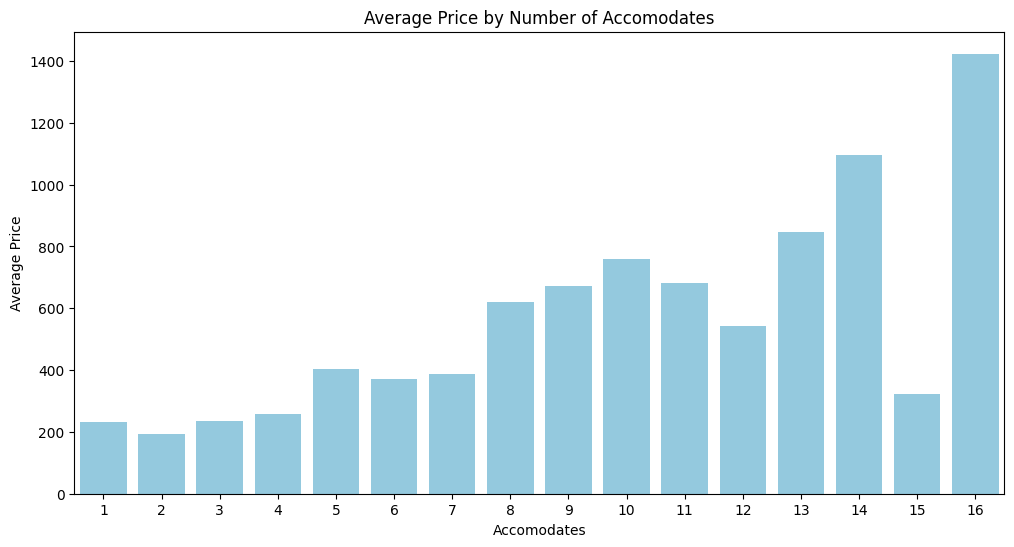

In [59]:
avg_price_by_accomodates = df.groupby('Accomodates')['Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Accomodates', y='Price', data=avg_price_by_accomodates, color='skyblue')
plt.title('Average Price by Number of Accomodates')
plt.xlabel('Accomodates')
plt.ylabel('Average Price')
plt.show()

In [54]:
numeric_df=df[['Min_nights', 'Max_nights', 'Accomodates', 'Total_bedrooms', 'Total_beds',
       'Availability_365', 'Price','Security_deposit', 'Cleaning_fee',
       'Extra_people', 'Guests_included', 'No_of_reviews', 'Review_score', 'Longitude', 'Latitude']]
correlation_df=numeric_df.corr()
correlation_df

,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,Availability_365,Price,Security_deposit,Cleaning_fee,Extra_people,Guests_included,No_of_reviews,Review_score,Longitude,Latitude
Min_nights,1.000000,-0.004656,-0.021778,0.009391,-0.019718,0.050029,-0.010497,0.066366,0.009180,-0.028927,-0.023849,-0.060679,-0.032877,-0.006455,0.041280
Max_nights,-0.004656,1.000000,0.001979,-0.010379,0.018963,-0.007259,0.000707,-0.002406,-0.007603,-0.003194,-0.005426,0.009563,-0.037829,0.004106,0.013461
Accomodates,-0.021778,0.001979,1.000000,0.740545,0.821831,0.111313,0.152593,0.088367,0.333694,0.057138,0.530047,0.016311,-0.022974,-0.114251,-0.070060
Total_bedrooms,0.009391,-0.010379,0.740545,1.000000,0.728663,0.060172,0.143843,0.090560,0.270479,0.021811,0.440392,-0.058995,-0.008183,-0.025704,-0.066553
Total_beds,-0.019718,0.018963,0.821831,0.728663,1.000000,0.114486,0.135208,0.083261,0.259568,0.069382,0.460418,-0.011025,-0.030101,-0.041171,-0.055854
Availability_365,0.050029,-0.007259,0.111313,0.060172,0.114486,1.000000,0.004393,0.009689,0.013665,0.041136,0.072509,0.069732,-0.039850,-0.085472,0.099129
Price,-0.010497,0.000707,0.152593,0.143843,0.135208,0.004393,1.000000,0.138825,0.187414,0.068278,0.048730,-0.065519,0.004398,0.099321,-0.086947
Security_deposit,0.066366,-0.002406,0.088367,0.090560,0.083261,0.009689,0.138825,1.000000,0.243540,0.158463,0.063623,-0.057052,-0.000476,0.075107,-0.089373
Cleaning_fee,0.009180,-0.007603,0.333694,0.270479,0.259568,0.013665,0.187414,0.243540,1.000000,0.198808,0.262901,-0.065772,0.040399,-0.039462,-0.205707
Extra_people,-0.028927,-0.003194,0.057138,0.021811,0.069382,0.041136,0.068278,0.158463,0.198808,1.000000,0.152548,0.013209,-0.000582,0.116288,-0.070783


<Axes: >

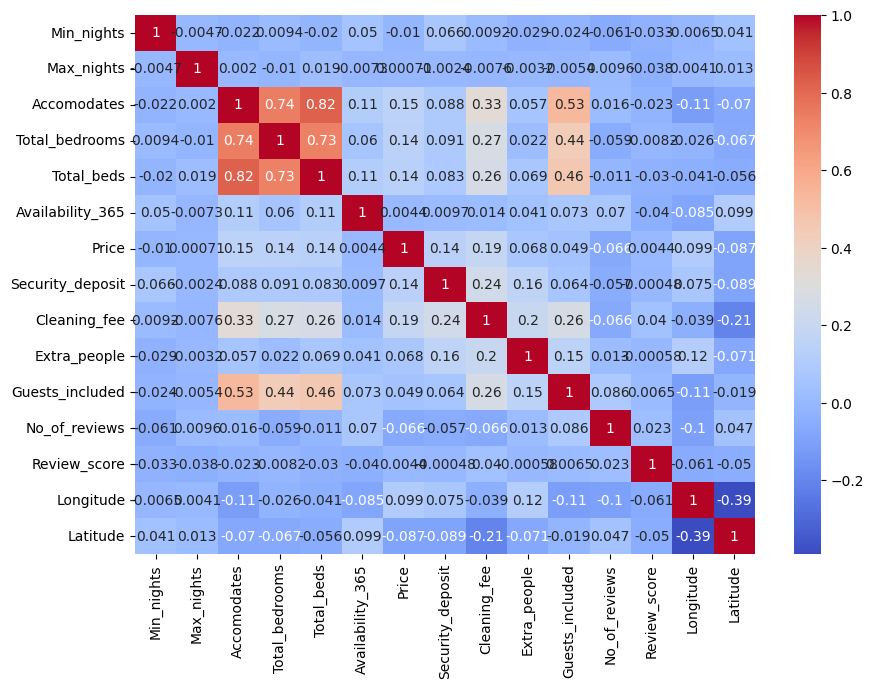

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation_df,cmap='coolwarm', annot=True)

In [56]:
avg_stay=df.groupby(['Room_type'])['Min_nights'].mean().reset_index(name='average_nights_stayed')
avg_stay

,Room_type,average_nights_stayed
0,Entire home/apt,6.409573
1,Private room,4.118507
2,Shared room,4.578313


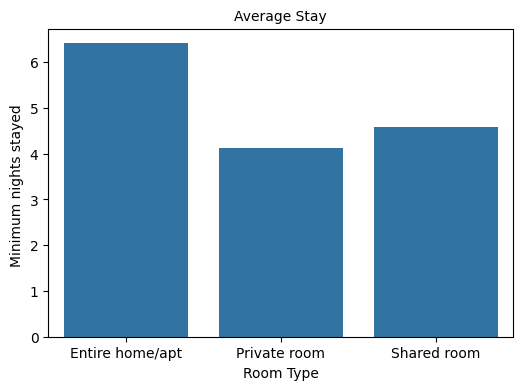

In [57]:
plt.figure(figsize = (6,4))
stay = sns.barplot(data=avg_stay, x='Room_type', y='average_nights_stayed')
stay.set_title('Average Stay',fontsize=10,color='Black')
stay.set_xlabel('Room Type',fontsize=10,color='Black')
stay.set_ylabel('Minimum nights stayed ',fontsize=10,color='Black')
plt.show()

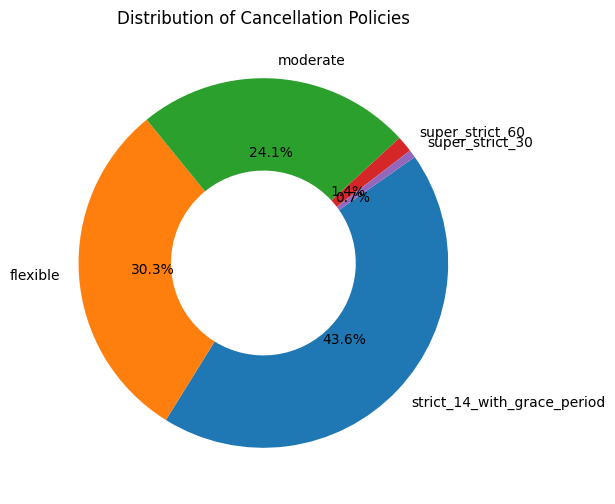

In [58]:
policy_counts = df['Cancellation_policy'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%', startangle=35, wedgeprops=dict(width=0.5), counterclock=False, rotatelabels=False)
plt.title('Distribution of Cancellation Policies')
plt.show()

In [60]:
rt_df = df.groupby('Room_type', as_index=False)['Price'].mean().sort_values(by='Price')
fig = px.bar(data_frame=rt_df, x='Room_type', y='Price', color='Price')
fig.show(renderer='browser')

In [61]:
rev_df = df.groupby('Room_type', as_index=False)['Review_score'].mean().sort_values(by='Review_score')
fig = px.bar(data_frame=rev_df, x='Room_type', y='Review_score', color='Review_score')
fig.show(renderer='browser')

<Figure size 640x480 with 0 Axes>

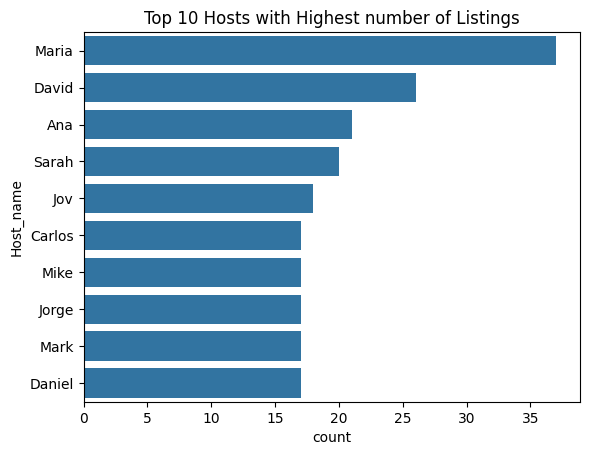

<Figure size 640x480 with 0 Axes>

In [62]:
HL = sns.countplot(data=df, y=df.Host_name, order=df.Host_name.value_counts().index[:10])
HL.set_title("Top 10 Hosts with Highest number of Listings")
plt.figure()

<Figure size 640x480 with 0 Axes>

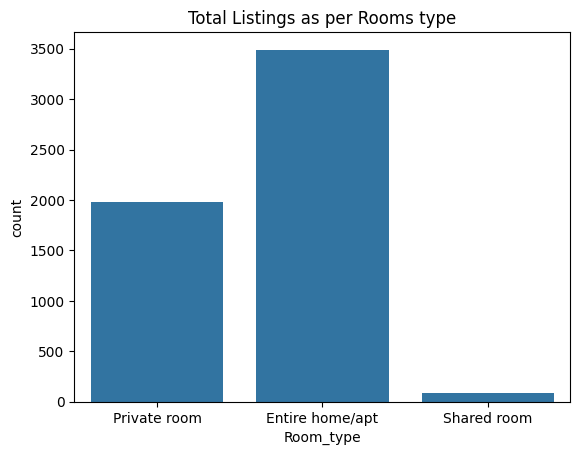

<Figure size 640x480 with 0 Axes>

In [63]:
TRT = sns.countplot(data=df, x=df.Room_type)
TRT.set_title("Total Listings as per Rooms type")
plt.figure()

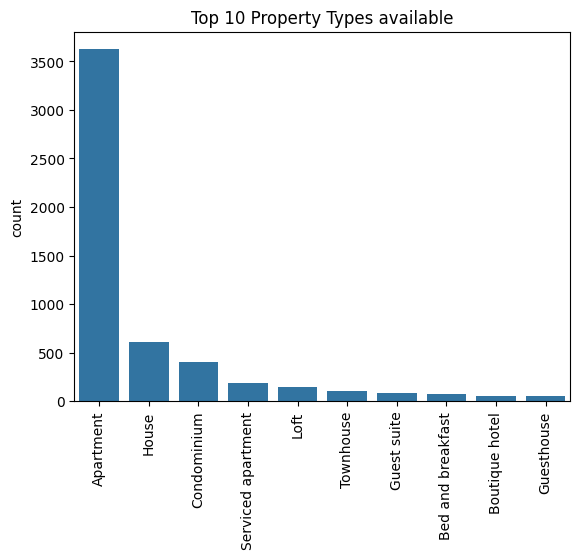

In [64]:
PT = sns.countplot(data=df, x=df.Property_type.values, order=df.Property_type.value_counts().index[:10])
PT.set_title('Top 10 Property Types available')
plt.xticks(rotation=90)
plt.show()